In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.lines import Line2D
from celmech import Andoyer, AndoyerHamiltonian
from celmech.andoyer import get_Xstarres, get_Xstarunstable, get_Xstarnonres, get_Xsep
from sympy import init_printing
from matplotlib.patches import ConnectionPatch
from matplotlib import ticker

init_printing()


%matplotlib inline
plt.style.use('paper.mplstyle')

In [2]:
dfres = pd.read_csv('../csvs/resPratios.csv', index_col=0)
dfrand = pd.read_csv('../csvs/randomPratios.csv', index_col=0)

In [3]:
dfrand.head()

,runstring,instability_time,shadow_instability_time,Stable,Pratio21,Pratio32,beta12,beta23
0,0000000.bin,1.235665e+07,8.315223e+07,False,1.350010,1.483755,8.508586,15.826967
1,0000001.bin,1.348749e+05,2.133072e+05,False,1.299174,1.663194,8.397002,15.367618
2,0000002.bin,1.276428e+04,9.321863e+03,False,1.194251,2.256854,3.461288,25.229467
3,0000003.bin,1.000000e+09,1.000000e+09,True,1.342041,1.373228,18.513681,19.145889
4,0000004.bin,8.791890e+01,8.791890e+01,False,1.051520,1.036905,5.494196,2.928938


In [4]:
(dfres['instability_time'] > 9.99e8).sum()

2599

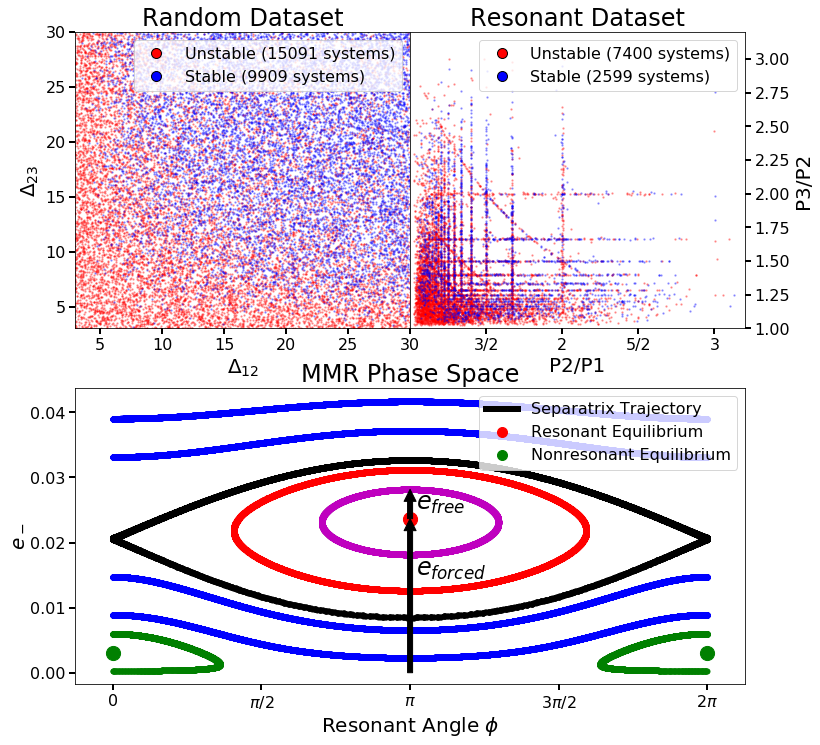

In [6]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, figure=fig)
gs.update(wspace=0.0)

stable = dfrand['instability_time'] > 9.99e8
ax1 = plt.subplot(gs[0, 0])
ax1.scatter(dfrand['beta12'][~stable], dfrand['beta23'][~stable], c = 'r', s=2, alpha=0.3)
ax1.scatter(dfrand['beta12'][stable], dfrand['beta23'][stable], c = 'b', s=2, alpha=0.3)

ax1.set_xlim([3,30])
ax1.set_ylim([3,30])
ax1.set_xlabel(r'$\Delta_{12}$')
ax1.set_ylabel(r'$\Delta_{23}$')
ax1.locator_params(nbins=6)
ax1.set_title('Random Dataset')


Nstable = stable.sum()
Nunstable = (~stable).sum()
legend_elements = [Line2D([0], [0], marker='o', lw=0, c='k', markerfacecolor='r', label='Unstable ({0} systems)'.format(Nunstable), markersize=10),
                   Line2D([0], [0], marker='o', lw=0, c='k', label='Stable ({0} systems)'.format(Nstable), markerfacecolor='b', markersize=10)]
ax1.legend(handles=legend_elements, loc='upper right')

stable = dfres['instability_time'] > 9.99e8
ax2 = plt.subplot(gs[0, 1])
ax2.scatter(dfres['Pratio21'][~stable], dfres['Pratio32'][~stable], c = 'r', s=2, alpha=0.3)
ax2.scatter(dfres['Pratio21'][stable], dfres['Pratio32'][stable], c = 'b', s=2, alpha=0.3)

ax2.set_xlim([1,3.2])
ax2.set_ylim([1,3.2])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('P3/P2')
ax2.set_xlabel('P2/P1')
ax2.set_title('Resonant Dataset')

ax2.set_xticks([1.5,2.,2.5, 3.])
ax2.set_xticklabels(['3/2', '2', '5/2', '3'])


Nstable = stable.sum()
Nunstable = (~stable).sum()
legend_elements = [Line2D([0], [0], marker='o', lw=0, c='k', markerfacecolor='r', label='Unstable ({0} systems)'.format(Nunstable), markersize=10),
                   Line2D([0], [0], marker='o', lw=0, c='k', label='Stable ({0} systems)'.format(Nstable), markerfacecolor='b', markersize=10)]
ax2.legend(handles=legend_elements, loc='upper right')


ax3 = plt.subplot(gs[1, 0:])

def wrap(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return val

npwrap = np.vectorize(wrap)

def Phiprime(B):
    return 8.*B/3.

def B(Phiprime):
    return 3.*Phiprime/8.

j=3
k=1

Phiprime = 2.
andvars = Andoyer(j=j, k=k, X=0., Y=0., B=B(Phiprime))
Xstarres = get_Xstarres(k, Phiprime)
Xstarnonres = get_Xstarnonres(k, Phiprime)
Xstarunstable = get_Xstarunstable(k, Phiprime)
Xsep_inner, Xsep_outer = get_Xsep(k, Phiprime)
Xbanana1 = Xstarres + (Xsep_outer-Xstarres)/2.
Xbanana2 = Xstarres + 5*(Xsep_outer-Xstarres)/6.
XIC = Xstarnonres + (Xstarunstable-Xstarnonres)/6.
Xcircle1 = Xstarnonres + (Xstarunstable-Xstarnonres)/3.
Xcircle2 = Xstarnonres + 2*(Xstarunstable-Xstarnonres)/3.
Xouter1 = Xsep_outer + (Xsep_outer-Xstarres)/2
Xouter2 = Xsep_outer + (Xsep_outer-Xstarres)

Zstarres = andvars.Zstar
Zstarunstable = andvars.Zstar_unstable
Zstarnonres = andvars.Zstar_nonres
Zsep_inner = andvars.Zsep_inner
Zsep_outer = andvars.Zsep_outer
Xs = [Xbanana1, Xbanana2, XIC, Xcircle1, Xcircle2, Xsep_outer, Xsep_inner, Xouter1, Xouter2]
colors = ['m', 'r', 'g', 'b', 'b', 'k', 'k', 'b', 'b']

for X, color in zip(Xs, colors):
    andvars = Andoyer(j=j, k=k, X=X, Y=0., B=B(Phiprime))
    H = AndoyerHamiltonian(andvars)
    tmax=100*andvars.params['tau']
    Nout = 10000
    times = np.linspace(0, tmax, Nout)

    Z, phi = np.zeros(Nout), np.zeros(Nout)
    for i, time in enumerate(times):
        H.integrate(time)
        Z[i] = H.state.Z
        phi[i] = H.state.phi
    ax3.plot(phi, Z, '.', c=color)
    
ax3.scatter(np.pi, Zstarres, c='r', marker='o', s=200)
ax3.scatter(0, Zstarnonres, c='g', marker='o', s=200)
ax3.scatter(2*np.pi, Zstarnonres, c='g', marker='o', s=200)
ax3.annotate("", xy=(np.pi, Zstarres), xytext=(np.pi, 0), arrowprops=dict(width=5, facecolor='k'))
ax3.annotate("", xy=(np.pi, Zstarres + (Zsep_outer-Zstarres)/2), xytext=(np.pi, Zstarres), arrowprops=dict(width=5, facecolor='k'))
ax3.text(3.2, 0.015, r"$e_{forced}$", fontsize=24)
ax3.text(3.2, 0.025, r"$e_{free}$", fontsize=24)
ax3.set_xticks([np.pi/2*i for i in range(5)])
ax3.set_xticklabels(['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
ax3.set_xlabel('Resonant Angle $\phi$')
ax3.set_ylabel('$e_-$')
ax3.set_title('MMR Phase Space')

legend_elements = [Line2D([0], [0], lw=6, c='k', label='Separatrix Trajectory'),
                   Line2D([0], [0], marker='o', lw=0, c='r', markerfacecolor='r', label='Resonant Equilibrium', markersize=10),
                   Line2D([0], [0], marker='o', lw=0, c='g', label='Nonresonant Equilibrium', markerfacecolor='g', markersize=10)]
ax3.legend(handles=legend_elements, loc='upper right')

fig.savefig('datasets.pdf', bbox_inches='tight')